<a href="https://colab.research.google.com/github/MarcelAleza1/SigmoidNeuron/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
w = 0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1 }
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

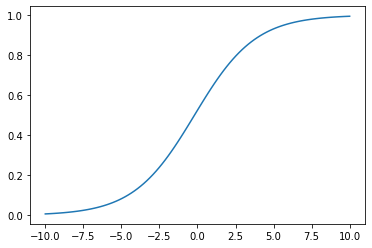

In [0]:
plt.plot(X,Y)
plt.show()

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-(x)))

In [0]:
X = np.linspace(-10,10,100)
Y = sigmoid(X)

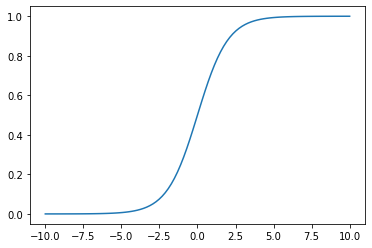

In [0]:
plt.plot(X,Y)
plt.show()

3D Sigmoid

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [0]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

xx1, xx2 = np.meshgrid(x1,x2)
print(x1.shape,x2.shape,xx1.shape,xx2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 =0.5
w2 = 0.5
b = 0
y= sigmoid_2d(xx1,xx2,w1,w2,b)

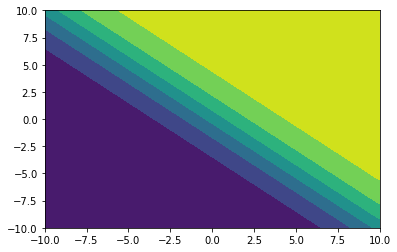

In [0]:
plt.contourf(xx1,xx2,y)
plt.show()

Text(0.5, 0, 'y')

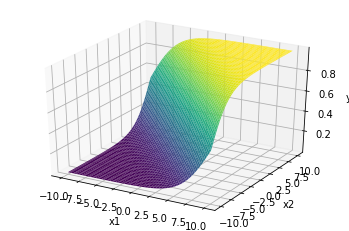

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2,y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

#Compute loss for a given dataset

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
W_unknown,b_unknown=0.5,0.25

X = np.random.random(25)*20-10
Y = sigmoid(X,W_unknown,b_unknown)

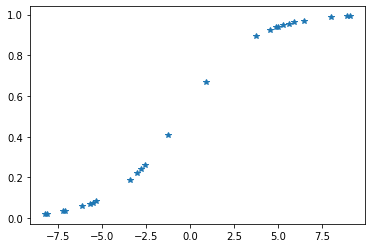

In [0]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
w= np.linspace(0,2,100)
b = np.linspace(-1,1,100)
ww,bb = np.meshgrid(w,b)
Loss = np.zeros(ww.shape)


In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,ww[i,j],bb[i,j])

Text(0.5, 0, 'loss')

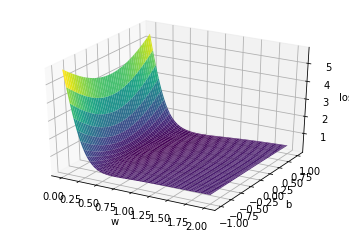

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb,Loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
#ax.view_init(30,180)

In [0]:
ij=np.argmin(Loss)
i=np.floor(ij/Loss.shape[1])
j=ij-i*Loss.shape[1]
print(i,j)

62.0 25.0


# Class for Sigmoid Neuron




In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
      return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
      return 1.0/(1.0+np.exp(-x))
  def grad_w(self,x,y):
      y_pred = self.sigmoid(self.perceptron(x))
      return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):
      y_pred = self.sigmoid(self.perceptron(x))
      return (y_pred-y)*y_pred*(1-y_pred)
  def fit(self, X,Y,epochs =1,learning_rate=1,initialise = True):
    
      # initalise w,b
      if initialise:
        self.w = np.random.randn(1,X.shape[1])
        self.b = 0
      for i in range(epochs):
        dw=0
        db=0
        for x,y in zip(X,Y):
          dw += self.grad_w(x,y)
          db += self.grad_b(x,y)

        self.w -= learning_rate*dw
        self.b-=learning_rate*db



#Fit for toy data

In [0]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [0]:
sn = SigmoidNeuron()

In [0]:
sn.fit(X,Y,1,0.75,True)

In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  xx1, xx2 = np.meshgrid(X1,X2)
  yy = np.zeros(xx1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      yy[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(xx1,xx2,yy,alpha=0.6)
  ax.scatter(X[:,0],X[:,1])
  ax.plot()


In [0]:
N =  30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.75,True)

# load data

In [0]:
#!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

In [0]:
data = pd.read_csv('mobile_cleaned1.csv')

In [0]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [0]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating', axis=1)
Y = data['Rating'].values


In [0]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2  
data['class'] = (data['Rating']>= threshold).astype(np.int)

In [0]:
data['class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [0]:
Y_binarized = data['class'].values

# Standardization

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
R = np.random.random([100,1])

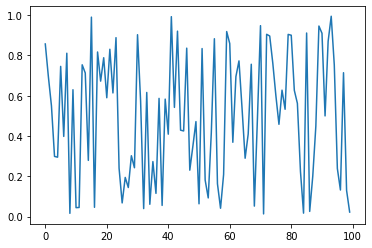

In [0]:
plt.plot(R)
plt.show()

In [0]:
np.mean(R)

0.4977496075925633

In [0]:
np.std(R)

0.31185591259914325

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaler.mean_

array([0.49774961])

In [0]:
RT = scaler.transform(R)

In [0]:
np.mean(RT)

-9.325873406851315e-17

In [0]:
np.std(RT)

0.9999999999999999

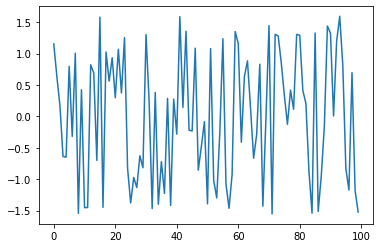

In [0]:
plt.plot(RT)
plt.show()

In [0]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,random_state=0, stratify = Y_binarized)

In [0]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

array([[ 1.29929126, -0.90185206,  0.03173306, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [-1.16225208, -0.86697607,  1.03451971, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [ 1.77523922,  0.65594214,  0.03173306, ..., -0.14142136,
        -0.15523011,  0.21232515],
       ...,
       [ 1.44058831, -0.58796815, -0.66464655, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [-1.42253612,  0.50481285,  1.54984063, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [ 1.06875397,  0.6791928 ,  0.97880934, ..., -0.14142136,
        -0.15523011,  0.21232515]])